# Graph generator
Regenerate specific graphs based on the csv's outputted by the Master Overview.

In [18]:
import pandas as pd
from util import plot_scores
from pprint import pprint

In [27]:
output_csv = 'outputs/model-evaluations-20230518-111838/scores-20230518-111915.csv'
df = pd.read_csv(output_csv)
df.sample(5)

,Unnamed: 0,model,auc,model_train_nan,imputer,chain,group,seed,epitope,species,train_alpha_only,train_beta_only,train_both,train_non,train_total,test_total,gene_features,missing_indicator,test_nr
72,2,HistGradientBoosting,NaN,True,NaN,both,gradient_boosting,2.0,GILGFVFTL,HomoSapiens,22.0,33.0,25.0,0.0,80.0,1.0,FV,False,15
140,0,Random Forest (Beta chain) (without nans),0.75,False,NaN,beta,chain_inputs,0.0,GILGFVFTL,HomoSapiens,0.0,0.0,21.0,0.0,21.0,5.0,FV,False,29
89,4,Random Forest (FV),1.00,True,NaN,both,gene_features,4.0,GILGFVFTL,HomoSapiens,26.0,34.0,20.0,0.0,80.0,6.0,FV,False,18
73,3,HistGradientBoosting,0.70,True,NaN,both,gradient_boosting,3.0,GILGFVFTL,HomoSapiens,22.0,39.0,19.0,0.0,80.0,7.0,FV,False,15
78,3,XGBoost,0.80,True,NaN,both,gradient_boosting,3.0,GILGFVFTL,HomoSapiens,22.0,39.0,19.0,0.0,80.0,7.0,FV,False,16


In [20]:
# print all unique model names
print(df['model'].unique())

['Random Forest (NaNs dropped in train)' 'Random Forest (Zero imputed)'
 'Random Forest (Mean imputed)' 'Random Forest (Most frequent imputed)'
 'Random Forest (Median imputed)' 'Random Forest (KNN imputed, k=1)'
 'Random Forest (KNN imputed, k=5)' 'Random Forest (KNN imputed, k=10)'
 'KNN Classifier' 'KNN Classifier (KNN imputed)'
 'Random Forest (Zero imputed) (with missing indicator)'
 'Random Forest (Mean imputed) (with missing indicator)'
 'Random Forest (Most frequent imputed) (with missing indicator)'
 'Random Forest (Median imputed) (with missing indicator)'
 'HistGradientBoosting' 'XGBoost' 'LightGBM' 'Random Forest (FV)'
 'Random Forest (F)' 'Random Forest (V)' 'Random Forest (F+V)'
 'Random Forest (FV+F+V)' 'Random Forest (both chains)'
 'Random Forest (Alpha chain)' 'Random Forest (Beta chain)'
 'Random Forest (Seperate chains)'
 'Random Forest (both chains) (without nans)'
 'Random Forest (Alpha chain) (without nans)'
 'Random Forest (Beta chain) (without nans)'
 'Random F

In [21]:
graphs_per_group = dict()
for group in df['group'].unique():
    graphs_per_group[group] = df[df['group'] == group]['model'].unique()
pprint(graphs_per_group)

{'baseline': array(['Random Forest (NaNs dropped in train)'], dtype=object),
 'chain_inputs': array(['Random Forest (both chains)', 'Random Forest (Alpha chain)',
       'Random Forest (Beta chain)', 'Random Forest (Seperate chains)',
       'Random Forest (both chains) (without nans)',
       'Random Forest (Alpha chain) (without nans)',
       'Random Forest (Beta chain) (without nans)',
       'Random Forest (Seperate chains) (without nans)'], dtype=object),
 'gene_features': array(['Random Forest (FV)', 'Random Forest (F)', 'Random Forest (V)',
       'Random Forest (F+V)', 'Random Forest (FV+F+V)'], dtype=object),
 'gradient_boosting': array(['HistGradientBoosting', 'XGBoost', 'LightGBM'], dtype=object),
 'knn': array(['KNN Classifier', 'KNN Classifier (KNN imputed)'], dtype=object),
 'rf_imputations': array(['Random Forest (Zero imputed)', 'Random Forest (Mean imputed)',
       'Random Forest (Most frequent imputed)',
       'Random Forest (Median imputed)'], dtype=object),
 'rf_

In [22]:
graphs_to_plot = ['Random Forest (NaNs dropped in train)']
# add "chain_inputs" group
graphs_to_plot.extend(graphs_per_group['chain_inputs'])

In [23]:
def get_score_df(df, graph_names):
    return df[df['model'].isin(graph_names)]

C:\Users\arnod\AppData\Local\Temp/ipykernel_17308/1451042148.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  score_df['model'] = score_df['model'].str.replace(' \(without nans\)', '')
C:\Users\arnod\AppData\Local\Temp/ipykernel_17308/1451042148.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_df['model'] = score_df['model'].str.replace(' \(without nans\)', '')


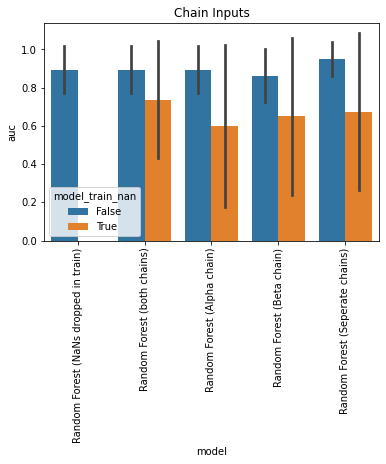

C:\Users\arnod\PycharmProjects\thesis\util\plot.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores["improvement"] = scores["auc"] - baseline
C:\Users\arnod\PycharmProjects\thesis\util\plot.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_yticklabels([f"{baseline + y:.2f}" for y in y_ticks])


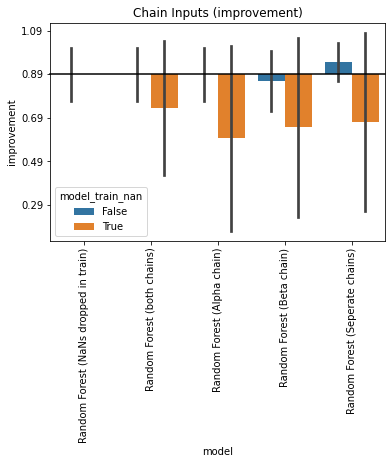

In [26]:
score_df = get_score_df(df, graphs_to_plot)
# remove " (without NaNs)" from model names, since it will be added as hue
score_df['model'] = score_df['model'].str.replace(' \(without nans\)', '')
plot_scores(score_df, "Chain Inputs", hue="model_train_nan")

In [24]:
h